In [143]:
import os
import pdb
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
search_word = '[14000/14616]'
# Train < Adapter > [e05][14000/14616] Loss 5.6505(5.7592) Acc 21.8750(19.8635)

# log_file = '../output_logs/baseline-2022-07-11T22-51-25Z-train_adapter.log'  # the one has no wandb exp

# log_file = '../output_logs/baseline-2022-07-13T05-28-35Z-train_adapter.log'
# log_file = '../output_logs/baseline-2022-07-13T05-32-16Z-train_adapter.log'

In [145]:
best_acc = 0
best_acc_epoch = 0
acc_list = []
loss_list = []
with open(log_file, 'r') as f:
    lines = f.readlines()
    
for line in lines:
    if search_word in line:
        line_elements = line.split()
        
        loss_idx = line_elements.index('Loss') + 1
        acc_idx =  line_elements.index('Acc') + 1
        
        for i in range(len(line_elements)):
            if search_word in line_elements[i]:
                epoch = line_elements[i].split(search_word)[0].split('[e')[1].split(']')[0]
                break
        
        acc = float(line_elements[acc_idx].split('(')[1].split(')')[0])
        loss = float(line_elements[loss_idx].split('(')[1].split(')')[0])
        acc_list.append(acc)
        loss_list.append(loss)
        
        if acc > best_acc:
            best_acc = acc
            best_acc_epoch = epoch
                
    # break

print('Best acc: {}'.format(best_acc))
print('Best acc epoch: {}'.format(best_acc_epoch))
print('In total, {} epochs'.format(len(acc_list)))

Best acc: 76.3496
Best acc epoch: 39
In total, 39 epochs


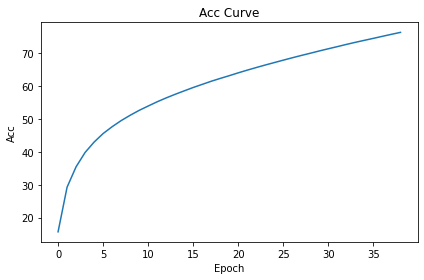

In [146]:
fig = plt.figure()
# ax = plt.axes()
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.title('Acc Curve')
plt.plot(acc_list)
plt.tight_layout()
plt.savefig('{}_acc_curve.png'.format(log_file[:-4]), bbox_inches='tight', transparent=True)
plt.show()
plt.close()

In [147]:
acc_list

[15.6933,
 29.2715,
 35.4774,
 39.8325,
 42.991,
 45.5797,
 47.661,
 49.516,
 51.139,
 52.6302,
 53.9506,
 55.2434,
 56.4193,
 57.5222,
 58.5636,
 59.5917,
 60.5381,
 61.4872,
 62.3504,
 63.1809,
 64.0482,
 64.8689,
 65.6607,
 66.4283,
 67.1678,
 67.9055,
 68.6304,
 69.3335,
 70.0082,
 70.7067,
 71.3701,
 72.0188,
 72.6895,
 73.3268,
 73.9356,
 74.5357,
 75.152,
 75.7605,
 76.3496]

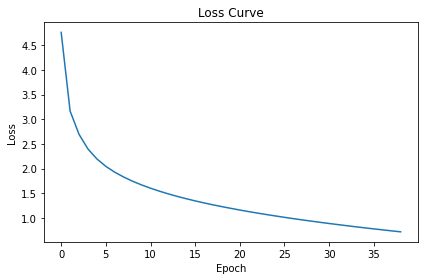

In [148]:
fig = plt.figure()
# ax = plt.axes()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss Curve')
plt.plot(loss_list)
plt.tight_layout()
plt.savefig('{}_loss_curve.png'.format(log_file[:-4]), bbox_inches='tight', transparent=True)
plt.show()
plt.close()